In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv(r"/Users/lijianwei/Downloads/day08_Taitanic data/data.csv",index_col=0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.drop(["Name","Cabin","Ticket"],inplace=True,axis=1) #删除不重要的列

In [8]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [9]:
#填补或删除缺失值
data["Age"]=data["Age"].fillna(data["Age"].mean())
data.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S
2,1,1,female,38.000000,1,0,71.2833,C
3,1,3,female,26.000000,0,0,7.9250,S
4,1,1,female,35.000000,1,0,53.1000,S
5,0,3,male,35.000000,0,0,8.0500,S
6,0,3,male,29.699118,0,0,8.4583,Q
7,0,1,male,54.000000,0,0,51.8625,S
8,0,3,male,2.000000,3,1,21.0750,S
9,1,3,female,27.000000,0,2,11.1333,S


In [11]:
data.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S
2,1,1,female,38.000000,1,0,71.2833,C
3,1,3,female,26.000000,0,0,7.9250,S
4,1,1,female,35.000000,1,0,53.1000,S
5,0,3,male,35.000000,0,0,8.0500,S
6,0,3,male,29.699118,0,0,8.4583,Q
7,0,1,male,54.000000,0,0,51.8625,S
8,0,3,male,2.000000,3,1,21.0750,S
9,1,3,female,27.000000,0,2,11.1333,S


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [19]:
data["Sex"]=(data['Sex']=="male").astype("int") #将文本数据转化为数字，男=1，女=0

In [20]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S
2,1,1,0,38.0,1,0,71.2833,C
3,1,3,0,26.0,0,0,7.9250,S
4,1,1,0,35.0,1,0,53.1000,S
5,0,3,1,35.0,0,0,8.0500,S


In [21]:
labels=data["Embarked"].unique().tolist()

In [22]:
labels

['S', 'C', 'Q', nan]

In [25]:
data["Embarked"]=data["Embarked"].apply(lambda x:labels.index(x)) #将文本数据转化为数字

In [26]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [27]:
#将数据分成特征数据和标签数据
x=data.iloc[:,data.columns!="Survived"]
y=data.iloc[:,data.columns=="Survived"]

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
6,0
7,0
8,0
9,1


In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [36]:
for i in [xtrain,xtest,ytrain,ytest]:
    i.index=range(i.shape[0])

In [37]:
xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,29.699118,0,0,7.7292,2
1,2,1,25.000000,1,2,41.5792,1
2,2,1,29.699118,0,0,15.0500,1
3,3,1,19.000000,0,0,8.1583,0
4,3,0,2.000000,0,1,10.4625,0


In [42]:
#导入模型
clf=DecisionTreeClassifier(random_state=30)
clf=clf.fit(xtrain,ytrain)
score=clf.score(xtest,ytest)

In [43]:
score

0.8022388059701493

In [44]:
score_=cross_val_score(clf,x,y,cv=10).mean()

In [45]:
score_

0.7823547270457383

In [49]:
#测试不同max_depth的模型的拟合程度
tr=[]
te=[]
for i in range(1,11):
    clf=DecisionTreeClassifier(random_state=30
                                            ,max_depth=i
                                           ,criterion="entropy"
                                        )
    clf=clf.fit(xtrain,ytrain)
    score_tr=clf.score(xtrain,ytrain)
    score_te=cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)


In [50]:
max(te)

0.8249773011008965

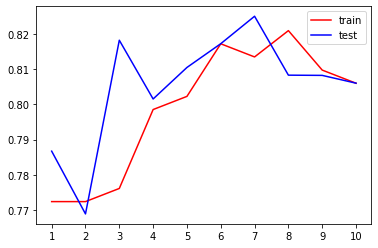

In [51]:
plt.plot(range(1,11),tr,color="red",label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [57]:
#通过网格搜索 设置最佳参数
parameters={'splitter':('best','random')
                   ,'criterion':('gini','entropy')
                   ,'max_depth':[*range(1,11)]
                   ,'min_samples_leaf':[*range(1,51,5)]}

In [58]:
parameters

{'splitter': ('best', 'random'),
 'criterion': ('gini', 'entropy'),
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46]}

In [59]:
clf=DecisionTreeClassifier(random_state=30)
GS=GridSearchCV(clf,parameters,cv=10)
GS.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=30,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
       

In [60]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [61]:
GS.best_score_

0.8186195826645265